In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url_train = 'https://raw.githubusercontent.com/Evans-colon/Supermarket-Sales-Prediction/master/dataset/train.csv'
url_test = 'https://raw.githubusercontent.com/Evans-colon/Supermarket-Sales-Prediction/master/dataset/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train.head()

In [3]:
df_train.info()

NameError: name 'df_train' is not defined

In [ ]:
df_train.isna().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
year_existence                       0
profit                               0
dtype: int64

In [ ]:
df_train['year_existence'] = 2016 - df_train['Supermarket_Opening_Year']
df_train['profit'] = df_train['Product_Supermarket_Sales'] - df_train['Product_Price']
df_train.drop('Product_Supermarket_Identifier', axis = 1)

,Product_Identifier,Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,year_existence,profit
0,DRA12,CHUKWUDI010,11.60,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,11,351.54
1,DRA12,CHUKWUDI013,11.60,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,22,6025.90
2,DRA12,CHUKWUDI017,11.60,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,2,6030.90
3,DRA12,CHUKWUDI018,11.60,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,0,1772.19
4,DRA12,CHUKWUDI035,11.60,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,5,2126.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,CHUKWUDI019,NaN,Low Fat,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14,24,3.75
4986,NCZ54,CHUKWUDI027,NaN,Low Fat,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69,24,13398.55
4987,NCZ54,CHUKWUDI045,14.65,Low Fat,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93,7,5279.79
4988,NCZ54,CHUKWUDI046,14.65,Low Fat,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00,12,11373.11


In [ ]:
num_col = df_train.select_dtypes(include=[np.number])
cat_col = df_train.select_dtypes(include=[object])
cat_col.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,Low Fat,Soft Drinks,NaN,Cluster 3,Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,Low Fat,Soft Drinks,High,Cluster 3,Supermarket Type1


In [ ]:
# cat_cols = ['Product_Fat_Content','Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type', 
#             'Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

In [ ]:
df_train.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,year_existence,profit
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164,11.216433,5711.716369
std,4.703256,0.053058,119.378259,8.283151,4447.333835,8.283151,4386.650032
min,4.555000,0.000000,78.730000,1992.000000,83.230000,0.000000,-5.000000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000,5.000000,2430.840000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000,10.000000,4980.270000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000,22.000000,8076.927500
max,21.350000,0.328391,667.220000,2016.000000,32717.410000,24.000000,32129.920000


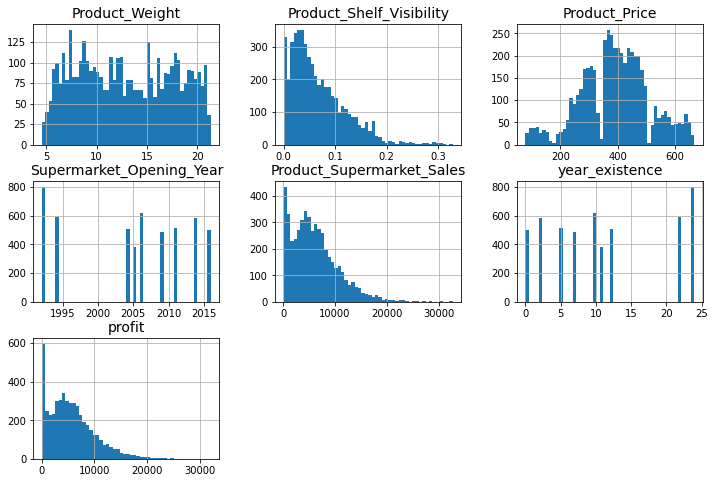

In [ ]:
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
df_train.hist(bins = 50, figsize=(12,8))
plt.show()

In [ ]:
num_col = df_train.select_dtypes(include=[np.number])
cat_col = df_train.select_dtypes(include=[object])
cat_col.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,Low Fat,Soft Drinks,NaN,Cluster 3,Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,Low Fat,Soft Drinks,High,Cluster 3,Supermarket Type1


In [ ]:
for col in cat_col:
    print('Value Count for', col)
    print(df_train[col].value_counts(normalize= True) * 100)
    print("-----------------------------------------------------------")
    

Value Count for Product_Identifier
DRE49    0.180361
NCL31    0.180361
FDG33    0.180361
NCC18    0.160321
FDR46    0.160321
           ...   
NCI31    0.020040
FDL58    0.020040
FDT46    0.020040
FDM02    0.020040
FDQ20    0.020040
Name: Product_Identifier, Length: 1451, dtype: float64
-----------------------------------------------------------
Value Count for Supermarket_Identifier
CHUKWUDI049    12.424850
CHUKWUDI013    11.903808
CHUKWUDI017    11.683367
CHUKWUDI035    10.320641
CHUKWUDI046    10.200401
CHUKWUDI018    10.020040
CHUKWUDI045     9.679359
CHUKWUDI027     9.258517
CHUKWUDI010     7.695391
CHUKWUDI019     6.813627
Name: Supermarket_Identifier, dtype: float64
-----------------------------------------------------------
Value Count for Product_Supermarket_Identifier
DRA12_CHUKWUDI010    0.02004
FDV50_CHUKWUDI018    0.02004
FDV51_CHUKWUDI027    0.02004
FDV51_CHUKWUDI018    0.02004
FDV51_CHUKWUDI017    0.02004
                      ...   
FDJ44_CHUKWUDI046    0.02004
FDJ44_CH

In [ ]:
# corr = num_col.corr()
# corr['Product_Supermarket_Sales'].sort_values(ascending = False)

Which supermarkets record high sales(percentage) and what could be the reason? could it be

    a. The price of products in that supermarket
    b. The goodwill of that supermarket?
    c. The size of the supermarket
    d. The type of supermarket. 
    e. The locaion of the supermarket.


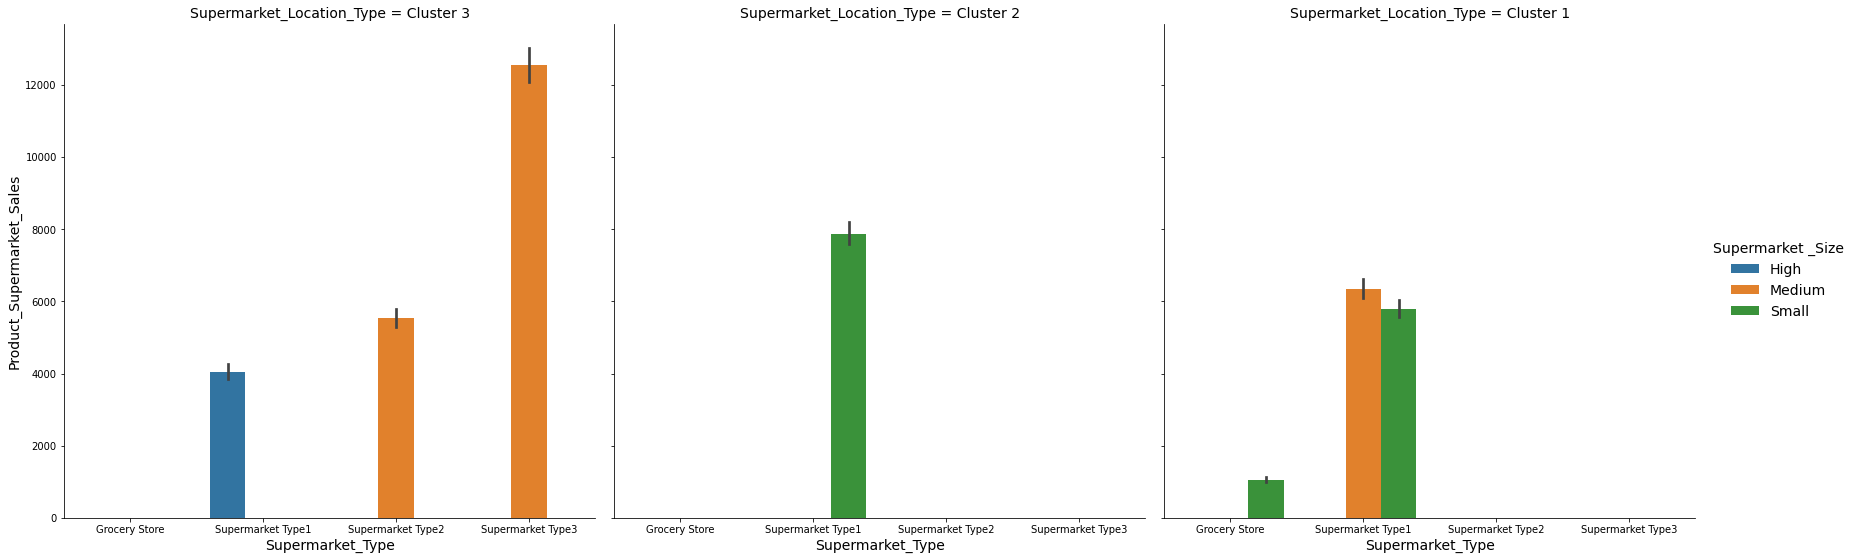

In [ ]:
ax = sns.catplot(x="Supermarket_Type", y="Product_Supermarket_Sales", hue="Supermarket _Size",
                 data=df_train, kind = 'bar', col = 'Supermarket_Location_Type',height = 8)

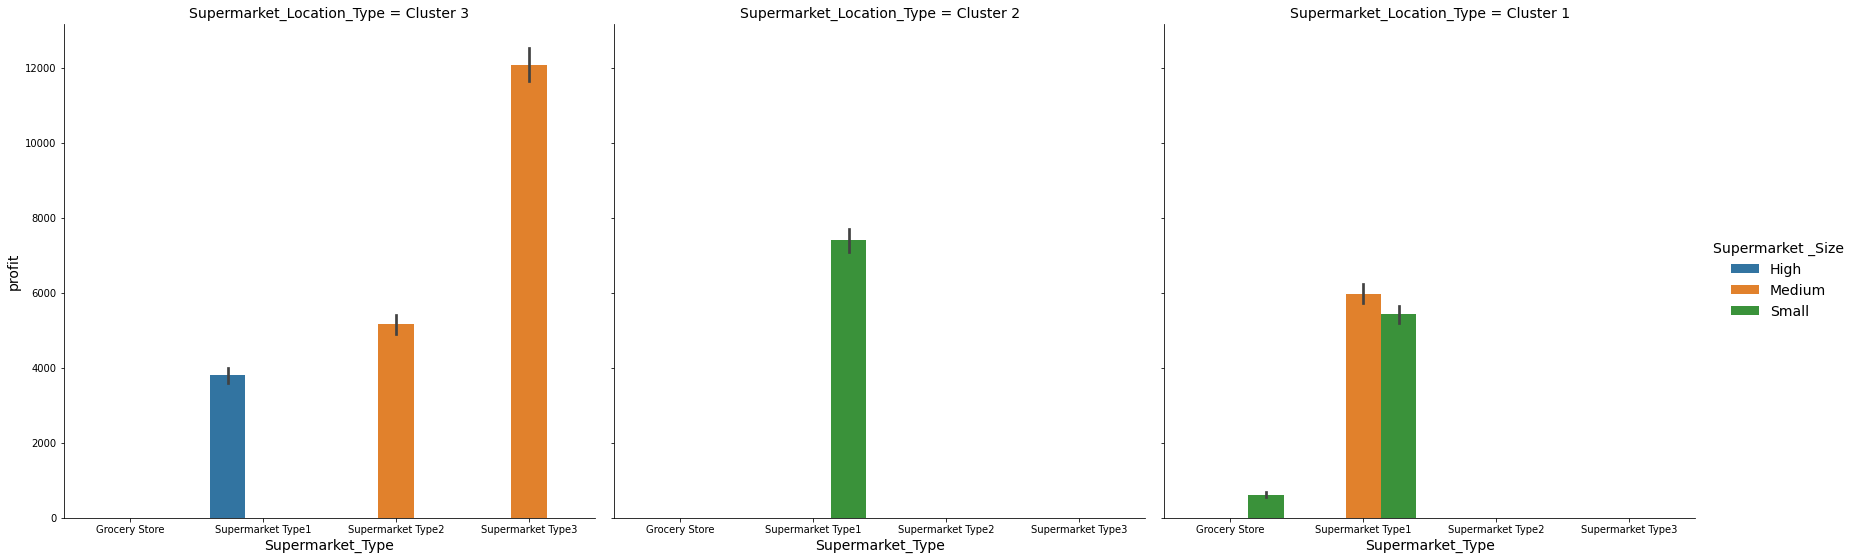

In [ ]:
ax = sns.catplot(x="Supermarket_Type", y="profit", hue="Supermarket _Size",
                 data=df_train, kind = 'bar', col = 'Supermarket_Location_Type',height = 8)

From this plot, we can infer that Mr. Chukwudi has seven supermarket types. These supermarkets are scattered across three locations. The locations are;

    a. cluster 1
    b. cluster 2
    c. cluster 3
    
In cluster 1, there are two supermarket_type_1(one medium and one small). In cluster 2, there is only one supermarket type which is supermarket_type_1(small). However, in cluster 3, there are three supermarkets. they are

    a. one large supermarket 
    b. two medium supermarket
    

In [ ]:
ax = sns.catplot(x="Supermarket_Type", y="profit", hue="Supermarket _Size",
                 data=df_train, kind = 'bar', col = 'Supermarket_Location_Type',height = 8)